In [74]:
%load_ext autoreload
%autoreload 2
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
df = pd.read_csv("lymphography.csv")

In [76]:
vectors = df.values

In [77]:
dataset = LabeledSet(18)
dataset.addExamples(vectors[:,1:], vectors[:,0:1])

In [78]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

# pessimistic rank discrimination measure
f_p = Mindsr()
g_p = Frac() 
prdm = Gdm(h, g_p, f_p)

# rank Gini discrimination measure 
g_g = One_minus()
rgdm = Gdm(h, g_g, f_r)

# H_M
h_m = Max()
g_m = One_minus_square()
H_m = Gdm(h_m, g_m, f_r)

# H_Q
f_q = Avgdsr()
h_q = Square_root()
H_q = Gdm(h_q, g_g, f_q)

In [79]:
train_set, test_set = split_dataset(dataset, 80)

In [97]:
tree1 = RDMT(sdm, "shannon", 0, 100, ceil(0.01 * train_set.size()), [1, 2])
tree1.train(train_set)
tree1.accuracy(test_set)

0.375

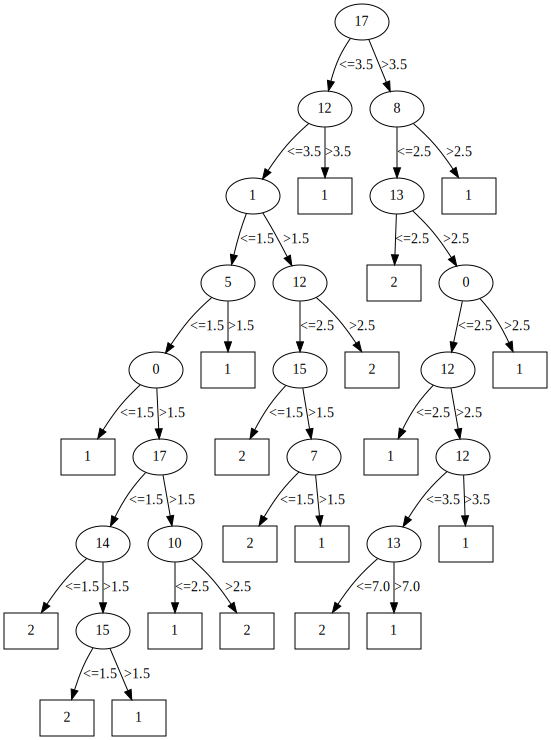

In [98]:
tree1.plot()

In [62]:
tree1 = RDMT(rsdm, "shannon", 0, 100, ceil(0.01 * train_set.size()), [1, 2])
tree1.train(train_set)

In [63]:
print("accuracy : ", tree1.accuracy(test_set))
print("depth : ", tree1.get_depth())
print("number of leaves : ", tree1.get_nb_leaves())
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", tree1.get_ratio_non_monotone_pairs())
print("average number of pairs used for ratio computing : ", tree1.get_total_pairs())

accuracy :  0.46875
depth :  11
number of leaves :  42
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.7672413793103449
average number of pairs used for ratio computing :  13


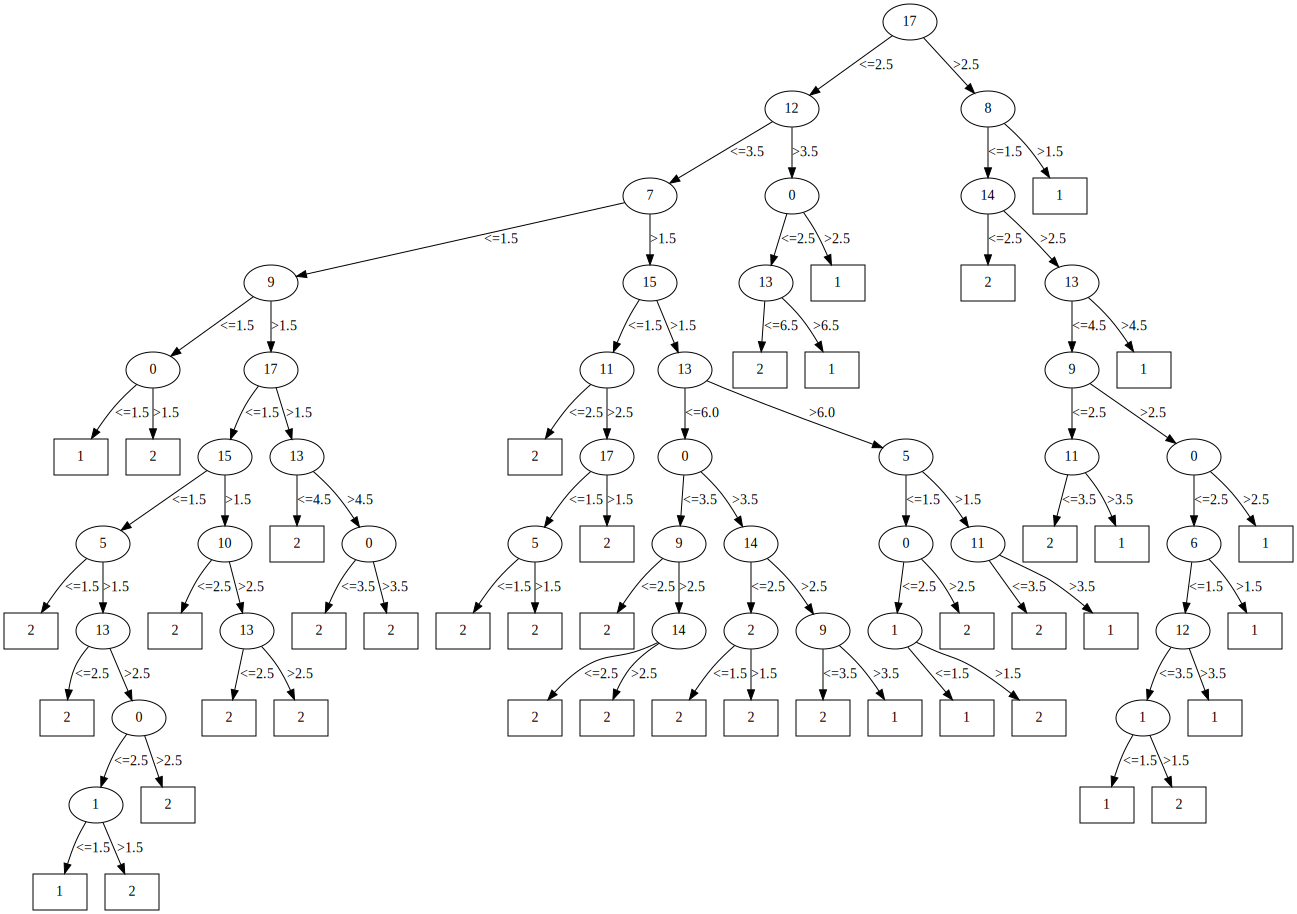

In [64]:
tree1.plot()

In [65]:
np.unique(dataset.y)

array([1, 2, 3, 4])

In [66]:
folds = get_folds(dataset, 2)

In [67]:
# Rank Shannon discrimination measure
avg_accuracy = 0
avg_leaves = 0
avg_depth = 0
avg_ratio = 0
avg_pairs = 0

for i in range(2):
    test_set = folds[i]
    train_set = LabeledSet(18)
    for j in range(0, 2):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(rsdm, "shannon", 0, 100, 0.01, [1, 2, 3, 4])
    tree.train(train_set)
    avg_accuracy += tree.accuracy(test_set)
    avg_leaves += tree.get_nb_leaves()
    avg_depth += tree.get_depth()
    avg_ratio += tree.get_ratio_non_monotone_pairs() 
    avg_pairs += tree.get_total_pairs()
        
avg_accuracy = avg_accuracy * (1.0/2)
avg_leaves = avg_leaves * (1.0/2)
avg_depth = avg_depth * (1.0/2)
avg_ratio = avg_ratio * (1.0/2)
avg_pairs = avg_pairs * (1.0/2)

print("average accuracy : ", avg_accuracy)
print("average depth : ", avg_depth)
print("average number of leaves : ", avg_leaves)
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", avg_ratio)
print("average number of pairs used for ratio computing : ", avg_pairs)

average accuracy :  0.7763470319634703
average depth :  9.5
average number of leaves :  31.5
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.7893150684931507
average number of pairs used for ratio computing :  8.0
